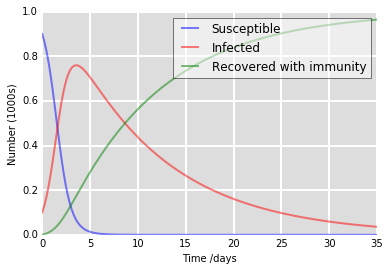

In [15]:
#scipython

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1.5, 0.1 
# A grid of time points (in days)
t = np.linspace(0, 35, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)/N
    dIdt = (beta * S * I)/N  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.0)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

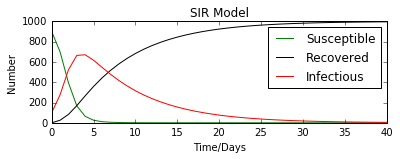

In [7]:
#wikipedia

import scipy.integrate as spi
import numpy as np
import pylab as pl
%matplotlib inline


beta=1.4247
gamma=0.14286
TS=1.0
ND=40.0
S0=900
I0=100
N = S0 + I0
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP    
    Y[0] =(- beta * V[0] * V[1])/N
    Y[1] = (beta * V[0] * V[1])/N - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#print RES

#Ploting
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptible')
pl.plot(RES[:,2], '-k', label='Recovered')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.legend(loc=0)
pl.title('SIR Model')
pl.xlabel('Time/Days')
pl.ylabel('Number')
#pl.subplot(212)
#pl.plot(RES[:,1], '-r', label='Infectious')
#pl.xlabel('Time')
#pl.ylabel('Infectious')
pl.show()


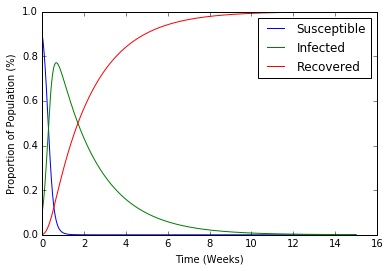

In [9]:
import matplotlib.pyplot as pyplot 
import scipy, scipy.integrate 
import pylab
%matplotlib inline

beta = 0.008 #contact rate
gamma = 0.5 #recovery rate
#mu = 0.9 #death rate
#ro = 0.8 #exposed to infectious rate
S0 = 900 
#E0 = 90 
I0 = 100 
R0 = 0 
#D0 = 0
N = S0 + I0 + R0 
Y0 = [ S0, I0, R0 ]
tMax = 15
T = scipy.linspace(0, tMax, 1001)

def SEIRD(Y, t, beta, gamma):
    S = Y[0]  
    I = Y[1] 
    R = Y[2] 

# The right-hand sides
    dS = (-beta * S * I)
    dI =(beta*I*S) - gamma * I 
    dR = gamma * I
    
# Convert meaningful component vectors into a single vector 
    dY = [ dS, dI, dR]
    return dY
 
solution = scipy.integrate.odeint(SEIRD,Y0,T,args = (beta, gamma))
S = solution[:, 0] 
I = solution[:, 1] 
R = solution[:, 2] 

pylab.figure()
pylab.plot(T, S / N, T, I / N, T, R / N)
pylab.xlabel('Time (Weeks)') 
pylab.ylabel('Proportion of Population (%)')
pylab.legend([ 'Susceptible', 'Infected', 'Recovered'])
'''pylab.plot(T, S, T, I, T, R ) pylab.xlabel('Time') pylab.ylabel('Population')
pylab.legend([ 'Susceptible','Exposed', 'Infected', 'Recovered', 'Dead' ])'''

# Actually display the plot 
pylab.show()

In [26]:
import matlab.engine
eng = matlab.engine.start_matlab()
% sir.m 
%
% Implements an SIR infection model
% dS/dt = -beta SI
% dI/dt = beta SI - delta I
% dR/dt = delta I
%
% Inputs:
% t - Time variable: not used here because our equation 
%     is independent of time, or 'autonomous'.
% x - Independent variable: this contains three
%     populations (S, I, and R)
% Output:
% dx - First derivative: the rate of change of the populations

function dx = sir(t, x) 
global beta delta; 

  dx = [0; 0; 0]; 

  dx(1) = -beta * x(1) * x(2); 
  dx(2) = beta * x(1) * x(2) - delta * x(2); 
  dx(3) = delta * x(2);


SyntaxError: invalid syntax (<ipython-input-26-3ccac4ef5465>, line 19)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

#Question 1
dataset = np.genfromtxt('cs111-svm-dataset---sheet1.csv', delimiter = ',', 
                        dtype = float)

In [2]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt('Spreadsheet for Realistic cs111 data - Sheet1.csv', delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

if __name__ == '__main__':
    run()
    
#dataset = np.genfromtxt('Spreadsheet for Realistic cs111 data - Sheet1.csv', delimiter = ',', 
                       # dtype = float)

IOError: Spreadsheet for Realistic cs111 data - Sheet1.csv not found.

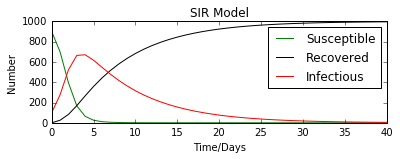

In [8]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
%matplotlib inline


beta=1.4247
gamma=0.14286
TS=1.0
ND=40.0
S0=900
I0=100
N = S0 + I0
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP    
    Y[0] =(- beta * V[0] * V[1])/N
    Y[1] = (beta * V[0] * V[1])/N - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)


#Ploting
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptible')
pl.plot(RES[:,2], '-k', label='Recovered')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.legend(loc=0)
pl.title('SIR Model')
pl.xlabel('Time/Days')
pl.ylabel('Number')
pl.show()
